# Introduction to PyTorch

In this lesson, we will learn the basics of PyTorch, a popular deep learning framework. We will cover the following topics:

1. Tensors
2. Autograd
3. Building a simple neural network

## 1. Tensors


In [2]:
import torch

# Create a tensor
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("x:", x)

# Create a tensor of zeros
y = torch.zeros(2, 2)
print("y:", y)

# Create a tensor of ones
z = torch.ones(2, 2)
print("z:", z)

# Create a random tensor
w = torch.rand(2, 2)
print("w:", w)

x: tensor([[1., 2.],
        [3., 4.]])
y: tensor([[0., 0.],
        [0., 0.]])
z: tensor([[1., 1.],
        [1., 1.]])
w: tensor([[0.4368, 0.5836],
        [0.1999, 0.1887]])


## 2. Autograd

In [3]:
# Create a tensor with requires_grad=True
import torch
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
print("x:", x)

# Define a simple function
y = x * x
print("y:", y)

# Compute the gradients, to minimize the loss = sum(x*x)
loss = y.sum()
loss.backward()
print("Gradients of x:", x.grad)

x: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
y: tensor([[ 1.,  4.],
        [ 9., 16.]], grad_fn=<MulBackward0>)
Gradients of x: tensor([[2., 4.],
        [6., 8.]])


## 3. Building a simple neural network

In [4]:
# Create an instance of the neural network
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 8, bias=False)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()

In [5]:
print(net)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Prepare some dummy data and labels
data = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)
labels = torch.tensor([[0.], [1.]], dtype=torch.float32)

# Train the neural network
for epoch in range(500):
    # Forward pass
    outputs = net(data)
    loss = criterion(outputs, labels)

    # IMPORTANT: Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print the loss for this epoch
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{500}], Loss: {loss.item():.4f}")


SimpleNet(
  (fc1): Linear(in_features=2, out_features=8, bias=False)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
Epoch [100/500], Loss: 0.0375
Epoch [200/500], Loss: 0.0132
Epoch [300/500], Loss: 0.0045
Epoch [400/500], Loss: 0.0015
Epoch [500/500], Loss: 0.0005


## 4. PyTorch Datasets and DataLoaders

Datasets and DataLoaders are essential components for handling data in PyTorch. A Dataset is a collection of data, and a DataLoader helps to efficiently load the data in batches during training.

In this example, we'll use the FashionMNIST dataset, which contains 60,000 training images and 10,000 testing images of 10 different clothing items.

In [6]:
import torchvision
import torchvision.transforms as transforms

# Define data transformations
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

# Create DataLoaders for train and test datasets
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=512, shuffle=False, num_workers=2
)

print("Num training examples: {}".format(len(train_dataset)))
print("Num test examples: {}".format(len(test_dataset)))


# List of class labels
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

Num training examples: 60000
Num test examples: 10000


## Visualizing Examples from the FashionMNIST Dataset

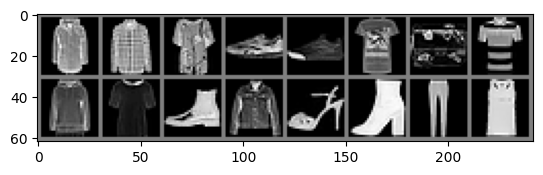

Coat -- Shirt -- Shirt -- Sneaker -- Sneaker -- T-shirt/top -- Bag -- T-shirt/top
Pullover -- Shirt -- Ankle boot -- Coat -- Sandal -- Ankle boot -- Trouser -- T-shirt/top


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the images in a grid along with their labels
imshow(torchvision.utils.make_grid(images[:16]))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8,16)))

With the dataset loaded and the DataLoader created, we can now train our neural network using the FashionMNIST dataset. Let's modify our previous SimpleNet example to handle 28x28 images and 10 output classes.

### Training on the CPU = Slow!

In [14]:
import torch.nn.functional as F

# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")

FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Epoch [1/5], Loss: 1.5608


KeyboardInterrupt: 

### Training on the GPU = Faster!

In [15]:
import torch.nn.functional as F

# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# IMPORTANT CODE BELOW
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Move the model to the GPU if available
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")

Using device: cuda:0
FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/5], Loss: 1.7987
Epoch [2/5], Loss: 0.6653
Epoch [3/5], Loss: 0.5466
Epoch [4/5], Loss: 0.4953
Epoch [5/5], Loss: 0.4582
Training finished.


Now that we have trained our neural network, let's evaluate its performance on the test dataset.

In [16]:
# Test the neural network
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 82.41%


Not bad!